In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

import deeptrade.env
from deeptrade.env import HoldAgent, EWMACAgent, BreakoutAgent

In [2]:
# Environment Options
seed = 3

env = gym.make("SingleInstrument-v0", seed=seed)

observations = {"Hold": [], "EWMAC": []}
agents = {"Hold": HoldAgent, "EWMAC": EWMACAgent}

for name, agent in agents.items():
    obs, _ = env.reset(seed=seed)
    agent = agent(env)
    terminated, truncated = False, False
    while (not terminated) and (not truncated):
        action = agent.act(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        observations[name].append(obs)

/home/quessy/.conda/envs/deeptrade-env/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/quessy/.conda/envs/deeptrade-env/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/quessy/.conda/envs/deeptrade-env/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/quessy/.conda/envs/deeptrade-env/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn

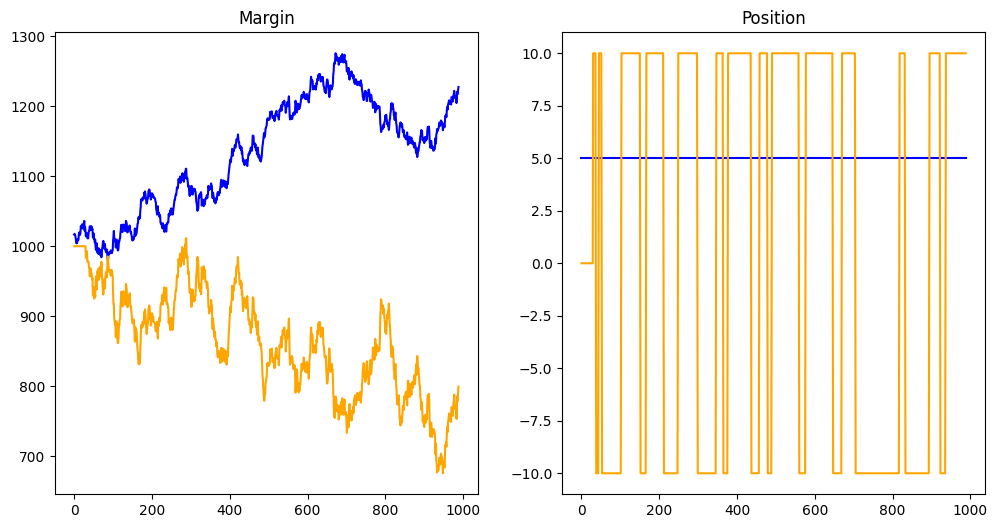

In [3]:
# Plot the performance of each of the agents
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(np.array(observations["Hold"])[:, -1], label="Hold", color="blue")
ax[0].plot(np.array(observations["EWMAC"])[:, -1], label="EWMAC", color="orange")
ax[0].set_title("Margin")
ax[1].plot(np.array(observations["Hold"])[:, -2], label="Hold", color="blue")
ax[1].plot(np.array(observations["EWMAC"])[:, -2], label="EWMAC", color="orange")
ax[1].set_title("Position")
fig.show()


/home/quessy/.conda/envs/deeptrade-env/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


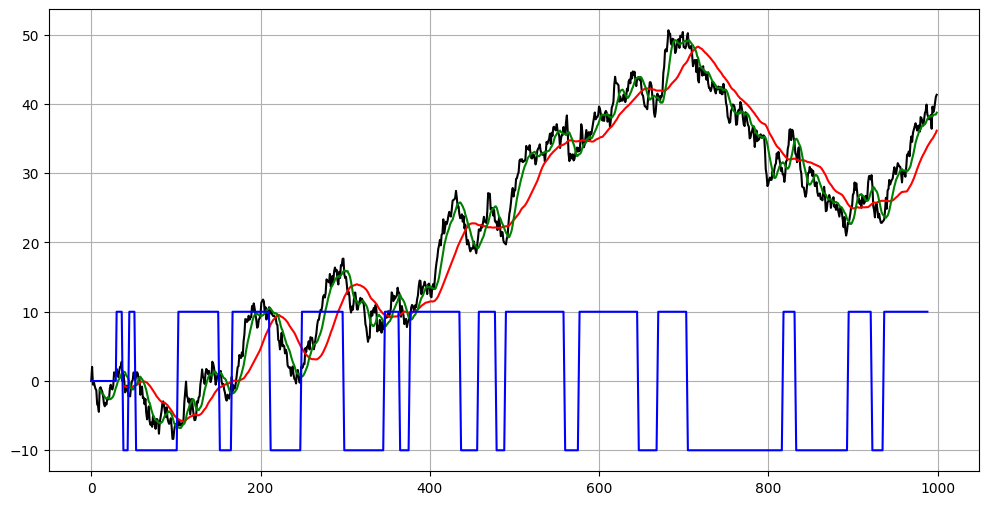

In [4]:
# Analyzing EWMAC closer

prices = env.unwrapped.price_data
slow_window = 40  # slower window average
fast_window = 10  # faster window average

slow_averages = []
fast_averages = []

for time in range(len(prices)):
    slow_averages.append(np.mean(prices[time-slow_window:time]))
    fast_averages.append(np.mean(prices[time-fast_window:time]))
    
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(prices, label="Price", color='black')
ax.plot(slow_averages, label="Slow Average", color='red')
ax.plot(fast_averages, label="Fast Average", color='green')
ax.plot(np.array(observations["EWMAC"])[:, -2], label="EWMAC", color='blue')
ax.grid()
fig.show()

## Over a random walk technical indicators like EWMAC should have no edge as there is no bias

(array([  1.,   0.,   2.,   9.,  20.,  41.,  71., 114., 139., 154., 160.,
        122.,  78.,  43.,  29.,  13.,   2.,   1.,   0.,   1.]),
 array([4771.39868065, 4892.68304794, 5013.96741523, 5135.25178252,
        5256.53614981, 5377.8205171 , 5499.1048844 , 5620.38925169,
        5741.67361898, 5862.95798627, 5984.24235356, 6105.52672085,
        6226.81108815, 6348.09545544, 6469.37982273, 6590.66419002,
        6711.94855731, 6833.2329246 , 6954.51729189, 7075.80165919,
        7197.08602648]),
 <BarContainer object of 20 artists>)

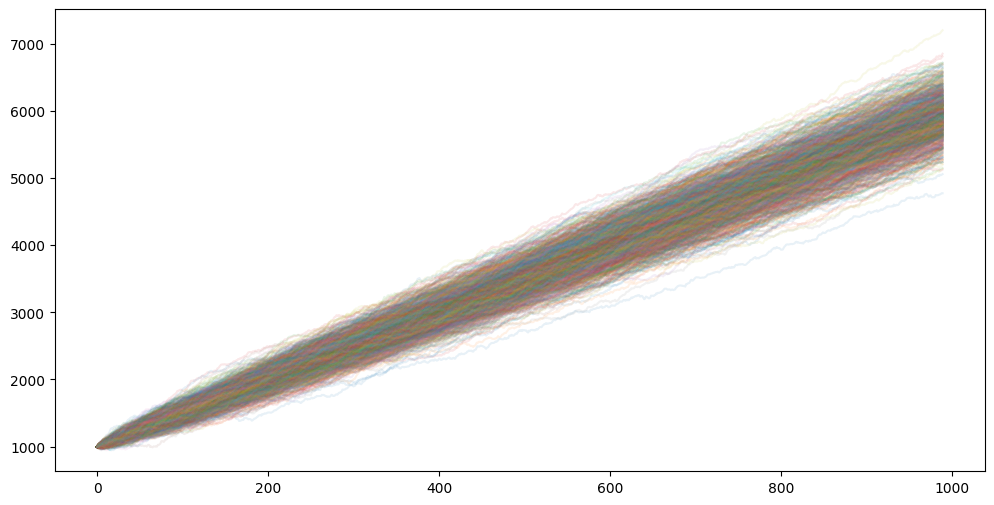

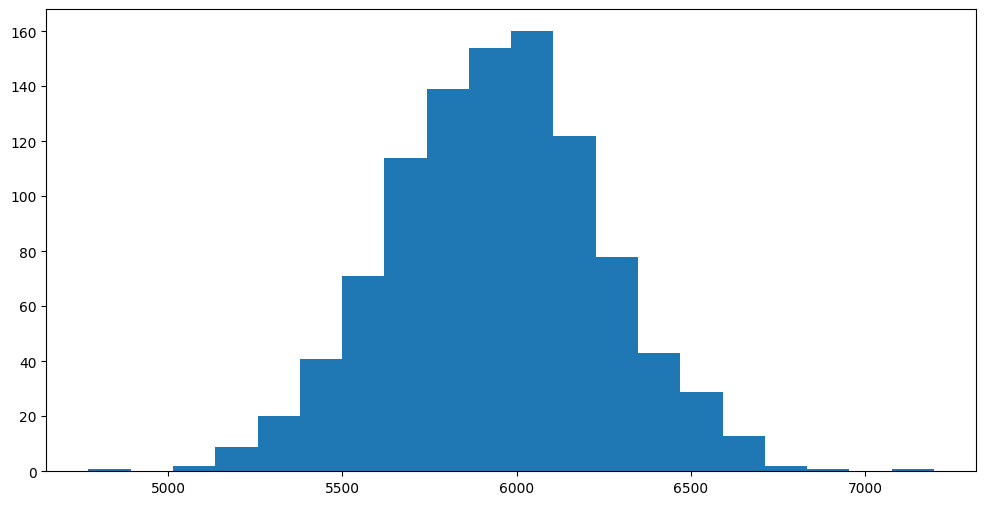

In [5]:
n_seeds = 1000

n_ewmac_obs = []
for seed in range(n_seeds):
    env = gym.make("SingleInstrument-v0", seed=seed, price_gen_info={"mean": 1.0, "std": 2.0, "n_days": 1000})
    obs, _ = env.reset(seed=seed)
    agent = HoldAgent(env)
    terminated, truncated = False, False
    ewmac_obs = [obs[-1]]
    while (not terminated) and (not truncated):
        action = agent.act(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        ewmac_obs.append(obs[-1])
    n_ewmac_obs.append(ewmac_obs)

# Plot the performance of each environment
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for obs in n_ewmac_obs:
    ax.plot(np.array(obs), alpha=0.1)
fig.show()

final_margin = np.array(n_ewmac_obs)[:, -1]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(final_margin, bins=20)